# Metric table paper figures

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
RES_DIR = "/Users/louis.kuemmerle/Promotion/projects/G1/results/spapros_smk_res_bm"
EVAL_BATCH = "eval_batch_bm_1"
SELECT_BATCH = ["batch_bm_1.1","batch_bm_1.2","batch_bm_1.3"]

In [9]:
df_eval = pd.read_csv(Path(RES_DIR, "evaluation_overview.csv"),index_col=0)
df_data = pd.read_csv(Path(RES_DIR, "data_parameters.csv"),index_col=0)
df_sele = pd.read_csv(Path(RES_DIR, "selection_overview.csv"),index_col=0).set_index("selection_name")

In [10]:
pd.crosstab(df_eval["eval_data_id"], df_eval["eval_dataset"])

eval_dataset,2019Hodge_sn_human_brain_MTG_min20perct,HLCA-raw_subsampled,Litvinukova2020_w_cts,Madissoon2019_w_cts,bone_marrow-raw,immune-raw_subsampled,kolabas_mouse_bone_marrow_subsampled,krasnow-raw,liver-raw,merfish_MTG_no_vessels,pbmc1k-raw,primary_motor_cortex_mmus-raw_subsampled,tabula_muris_senis-raw_subsampled,thymus-raw_subsampled
eval_data_id,,,,,,,,,,,,,,
40,0,0,2120,0,0,0,0,0,0,0,0,0,0,0
41,0,0,0,2120,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,320,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,320
93,0,0,0,0,0,0,0,0,0,0,0,0,320,0
94,0,0,0,0,0,0,320,0,0,0,0,0,0,0
95,0,320,0,0,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,320,0,0,0
127,0,0,0,0,320,0,0,0,0,0,0,0,0,0


In [11]:
DATASETS = ['Litvinukova2020_w_cts', 'Madissoon2019_w_cts']

In [12]:
# Prepare plot df

# Mapping from data_id to dataset
id_to_dataset = {}
for i in df_eval.loc[df_eval["eval_batch"] == EVAL_BATCH, "eval_data_id"].unique():
    dataset = df_data.loc[i,"dataset"]
    if dataset in DATASETS:
        id_to_dataset[i] = df_data.loc[i,"dataset"]
    
# Get data_id for eval_batch6.1 (evaluation on brain snRNA-seq)
#dataset = id_to_dataset[data_id]

# Load metrics
dfs = []
for data_id, dataset in id_to_dataset.items():
    summary_file = Path(RES_DIR, f"evaluation/{dataset}_{data_id}_summary.csv")
    df_ = pd.read_csv(summary_file, index_col=0)
    df_["dataset"] = dataset
    dfs.append(df_)
df = pd.concat(dfs)

# Subset to selections of batch6.1 and add selection info to df (selections on bootstrap samples of brain snRNA-seq)
df_selections = df_sele.loc[df_sele["batch"].isin(SELECT_BATCH)].copy()
df = df.loc[df_selections.index]
df["method"] = df_selections["method"]
df["n"] = df_selections["n"]


# Calculate aggreate scores
df["ct score"] = (df['forest_clfs accuracy'] + df['forest_clfs perct acc > 0.8']) / 2
df["var score"] = (
    df['knn_overlap mean_overlap_AUC'] +
    df['cluster_similarity nmi_5_20'] +
    + df['cluster_similarity nmi_21_60']
) / 3
df["score"] = (df["ct score"] + df["var score"]) / 2

# Load time measurements
times = []
for selection_id in df.index:
    time_file = Path(RES_DIR, f"selection/{selection_id}_info.csv")
    df_ = pd.read_csv(time_file, index_col=0)
    times.append(df_.iloc[0]["time_seconds"])
df["time"] = times

In [14]:
tmp = df.copy()
tmp["dmn"] = tmp["dataset"] + "_" + tmp["method"] + "_" + tmp["n"].astype(str)
tmp["dmn"].value_counts().iloc[:60]

dmn
Madissoon2019_w_cts_spapros_50          20
Litvinukova2020_w_cts_cosg_50           20
Litvinukova2020_w_cts_DE_50             20
Litvinukova2020_w_cts_DE_150            20
Litvinukova2020_w_cts_pca_50            20
Madissoon2019_w_cts_spapros_150         20
Litvinukova2020_w_cts_scgenefit_50      20
Litvinukova2020_w_cts_scgenefit_150     20
Litvinukova2020_w_cts_nsforest_50       20
Litvinukova2020_w_cts_nsforest_150      20
Litvinukova2020_w_cts_scmer_50          20
Litvinukova2020_w_cts_scmer_150         20
Litvinukova2020_w_cts_cosg_150          20
Litvinukova2020_w_cts_spaproscto_50     20
Litvinukova2020_w_cts_triku_50          20
Litvinukova2020_w_cts_triku_150         20
Litvinukova2020_w_cts_selfe_50          20
Litvinukova2020_w_cts_selfe_150         20
Litvinukova2020_w_cts_scpnmf_50         20
Litvinukova2020_w_cts_scpnmf_150        20
Litvinukova2020_w_cts_genebasis_50      20
Litvinukova2020_w_cts_genebasis_150     20
Madissoon2019_w_cts_asfs_50             20
Litvinu

In [15]:
df = df.groupby(["dataset","method", "n"]).mean()
df = df.reset_index()

In [16]:
df

,dataset,method,n,knn_overlap mean_overlap_AUC,cluster_similarity nmi_5_20,cluster_similarity nmi_21_60,gene_corr 1 - mean,gene_corr perct max < 0.8,forest_clfs accuracy,forest_clfs perct acc > 0.8,ct score,var score,score,time
0,Litvinukova2020_w_cts,DE,50,0.032601,0.815723,0.661231,0.873053,0.998216,0.520483,0.113595,0.317039,0.503185,0.410112,190.762564
1,Litvinukova2020_w_cts,DE,150,0.090563,0.887172,0.757212,0.882790,0.991333,0.602363,0.189033,0.395698,0.578315,0.487007,211.691539
2,Litvinukova2020_w_cts,asfs,50,0.025867,0.687180,0.557122,0.932010,0.996993,0.448051,0.034278,0.241165,0.423390,0.332277,81051.837493
3,Litvinukova2020_w_cts,cosg,50,0.004962,0.123556,0.296197,0.984365,1.000000,0.249007,0.000454,0.124730,0.141571,0.133151,4.092418
4,Litvinukova2020_w_cts,cosg,150,0.009151,0.446887,0.415866,0.987112,1.000000,0.370460,0.008686,0.189573,0.290635,0.240104,4.274995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Madissoon2019_w_cts,spapros,150,0.279607,0.841294,0.798277,0.855853,0.869984,0.880445,0.819447,0.849946,0.639726,0.744836,5911.013556
58,Madissoon2019_w_cts,spaproscto,50,0.060039,0.781577,0.666740,0.882498,0.863211,0.873243,0.790063,0.831653,0.502785,0.667219,3385.156035
59,Madissoon2019_w_cts,spaproscto,150,0.108124,0.829057,0.746125,0.882405,0.840061,0.898144,0.872839,0.885492,0.561102,0.723297,7177.990027
60,Madissoon2019_w_cts,triku,50,0.001237,0.030921,0.029201,0.596178,1.000000,0.127272,0.075836,0.101554,0.020453,0.061004,273.389220


# Plot

In [17]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from matplotlib import colors
from matplotlib import patches

plt.rcParams['figure.dpi'] = 150
SMALL_SIZE =   9  #17
MEDIUM_SIZE = 11  #19
BIGGER_SIZE = 13  #21
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### plot functions

In [18]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import seaborn as sns



def format_time(time):
    """
    time: float
        in seconds.

    Return
    ------
    str
        formatted time
    """
    days = int(time // (3600 * 24))
    hours = int(time // 3600)
    mins = int(time // 60)
    secs = int(time // 1)
    unit = ["d", "h", "min", "sec"]
    for t, u in zip([days, hours, mins, secs], unit):
        if t > 0:
            return f"{t} {u}"
    return "0 sec"


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def summary_table(
    table,
    summaries="all",
    color_maps={},
    rename_cols={},
    rename_rows={},
    time_format=[],
    log_scale=[],
    color_limits={},
    nan_color='lightgrey',
    threshold_ann={},
    groups=[],
    xticklabel_rotation=0,
    xticklabel_multialignment='right',
    max_val_bold=True,
    show=True,
    save=False,
):
    """Plot table of summary statistics

    table: pd.DataFrame

    summaries: "all" or list of strs
        List of summary metrics that are plotted.
    color_maps: dict
        Color maps assigned to summary metrics. Use the initial name and not the potential new name
        given via `rename_cols`.
    rename_cols: dict
        Rename summary metrics for plot.
    rename_rows: dict
        Rename set ids.
    time_format: list of strs
        Summary names that are formatted to days, hours, mins and secs (seconds are expected as input).
    log_scale: list of strs
        Summary names for which a log scaled colormap is applied.
    color_limits: dict of lists of two floats
        For each summary metric optionally provide vmin and vmax for the colormap.
    nan_color: str
        Color for nan values.
    threshold_ann: dict
        Special annotation for values above defined threshold. E.g. {"time":{"th":1000,"above":True,"ann":"> 1k"}}
    groups: List[List[str,[int,int]]]
        For group brackets
    max_val_bold: bool
        Wheter to show the max (min for time formats) value in each column with bold formatting
    xticklabel_multialignment: str
        How to align multi line x tick labels. (one of 'center', 'right', 'left')

    """

    fsize = 15
    figsize_factor = 0.85

    # Default order and colors
    default_order = ["score","cluster_similarity", "knn_overlap", "Greens", "forest_clfs", "marker_corr", "gene_corr",
                     "penalty"]
    default_cmaps = {
        "cluster_similarity": "Greens",
        "knn_overlap": "Greens",
        "forest_clfs": "Purples",#"Reds",
        "marker_corr": "Purples",#"Reds",
        "gene_corr": "Blues",
        "penalty": truncate_colormap(plt.get_cmap('Greys'), minval=0.05, maxval=0.7, n=100), #"Greys",
        "other": "Greys",
    }

    if summaries == "all":
        summaries = table.columns.tolist()
        for s in summaries:
            if s not in default_order:
                default_order.append(s.split()[0])
        # Order by default order of metrics and length of summary
        summaries.sort(key=lambda s: default_order.index(s.split()[0]) * 100 + len(s))

    cmaps = {}
    for summary in summaries:
        if summary in color_maps:
            cmaps[summary] = color_maps[summary]
        elif summary.split()[0] in default_cmaps:
            cmaps[summary] = default_cmaps[summary.split()[0]]
        else:
            cmaps[summary] = default_cmaps["other"]

    # Init final table for plotting
    df = table[summaries].copy()

    # Register potential new names of columns that are time formatted or log transformed
    for col in df.columns:
        if (col in time_format) and (col in rename_cols):
            time_format.append(rename_cols[col])
        if (col in log_scale) and (col in rename_cols):
            log_scale.append(rename_cols[col])
        if (col in color_limits) and (col in rename_cols):
            color_limits[rename_cols[col]] = color_limits[col]
        if (col in threshold_ann) and (col in rename_cols):
            threshold_ann[rename_cols[col]] = threshold_ann[col]
        
    # Rename columns
    df = df.rename(columns=rename_cols, index=rename_rows)
    
    # Replace old column names with new names in colormaps
    for summary, new_key in rename_cols.items():
        cmaps[new_key] = cmaps.pop(summary)

    n_cols = len(df.columns)
    n_sets = len(df.index)

    draw_group_brackets = True if groups else False
    
    fig = plt.figure(figsize=(figsize_factor*n_cols * 1.05, figsize_factor*(n_sets+int(draw_group_brackets))))
    if draw_group_brackets:
        gs1 = gridspec.GridSpec(n_sets+int(draw_group_brackets),n_cols)
    else:
        gs1 = gridspec.GridSpec(1, n_cols)
    gs1.update(wspace=0.0, hspace=0.0)

    multi_col = {}
    cols = df.columns.tolist()
    for col in df.columns.unique():
        count = cols.count(col)
        if count > 1:
            multi_col[col] = 0
        
    for group in groups:
        n_cols_group = group[1][1] - group[1][0] + 1
        ax = plt.subplot(gs1[0,group[1][0]:group[1][1]+1])
        ax.axis('off')
        ax.set_xlim([0,n_cols_group])
        ax.set_ylim([0,1])
        #if n_cols_group > 1:
        #    x1 , x2 = [0.5 , n_cols_group-0.5]
        #else:
        #    x1 , x2 = [0.3 , n_cols_group-0.3]
        x1 , x2 = [0.2 , n_cols_group-0.2]
        y , h = [0,0.12]#[0,0.3]
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2.5, c="black")
        plt.text((x1+x2)*.5, y+h, group[0], ha='center', va='bottom', color="black", fontsize=fsize)
        
    
    for i, col in enumerate(df.columns):

        
        ax = plt.subplot(gs1[1:,i]) if draw_group_brackets else plt.subplot(gs1[i])

        yticklabels = bool(i == 0)

        if col in multi_col: # TODO: time formating multi col support? Better get col pos at the beginning + iloc
            col_pos = [i for i, c in enumerate(df.columns) if c == col][multi_col[col]]
            color_vals = np.log(df.iloc[:,[col_pos]]) if (col in log_scale) else df.iloc[:,[col_pos]]
            multi_col[col] += 1
        else:
            color_vals = np.log(df[[col]]) if (col in log_scale) else df[[col]]
            col_pos = [i for i, c in enumerate(df.columns) if c == col][0]
            
        if col in time_format:
            #annot = df[col].apply(format_time).values[:, np.newaxis]
            annot = df.iloc[:,col_pos].apply(format_time).values[:, np.newaxis]
            fmt = ""
        else:
            annot = True
            fmt = ".2f"
        if col in threshold_ann:
            formatter = lambda s: f"{s:.2f}"
            annot = df.iloc[:,col_pos].apply(formatter).values[:, np.newaxis] if isinstance(annot,bool) else annot
            tmp = threshold_ann[col]            
            th_mask = (df.iloc[:,col_pos] > tmp["th"]) if tmp["above"] else (df.iloc[:,col_pos] < tmp["th"])
            annot[th_mask,:] = tmp["ann"]
            fmt=""

        g = sns.heatmap(
            color_vals,
            cmap=cmaps[col],
            annot=annot,
            mask=color_vals.isnull(),
            cbar=False,
            square=True,#(not draw_group_brackets),
            yticklabels=yticklabels,
            fmt=fmt,
            annot_kws={"fontsize": fsize - 2},
            vmin=color_limits[col][0] if (col in color_limits) else None,
            vmax=color_limits[col][1] if (col in color_limits) else None,
        )
        g.set_facecolor(nan_color)
        plt.tick_params(
            axis="x", which="major", labelsize=fsize, labelbottom=True, bottom=True, 
            top=False, labeltop=False
        )
        plt.tick_params(axis="y", which="major", labelsize=fsize)
        ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment="center", rotation=xticklabel_rotation, multialignment=xticklabel_multialignment)#'right')
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        if i > 0:
            ax.set_ylabel("")
        if max_val_bold:
            if col in time_format:
                extremum = format_time(df.iloc[:,col_pos].min())
            else:
                extremum = f"{np.max(color_vals[col].values):.2f}"
            for text in g.texts:
                if text.get_text() == extremum:
                    text.set_weight('bold')            
    
    if show:
        plt.show()
    if save:
        fig.savefig(save, bbox_inches="tight")
    plt.close()

### call fcts

In [19]:
plot_df = df.loc[(df["dataset"] == "Litvinukova2020_w_cts") & (df["n"] == 50)].sort_values("score", ascending=False).copy()
plot_df = plot_df.set_index("method")
del plot_df["dataset"]
del plot_df["n"]

In [20]:
plot_df

,knn_overlap mean_overlap_AUC,cluster_similarity nmi_5_20,cluster_similarity nmi_21_60,gene_corr 1 - mean,gene_corr perct max < 0.8,forest_clfs accuracy,forest_clfs perct acc > 0.8,ct score,var score,score,time
method,,,,,,,,,,,
spapros,0.055735,0.816269,0.683461,0.892044,0.981275,0.564460,0.118990,0.341725,0.518488,0.430107,18310.820343
genebasis,0.086423,0.811830,0.693699,0.872464,0.976765,0.541686,0.109071,0.325378,0.530651,0.428015,14961.578461
selfe,0.080913,0.805773,0.670312,0.851185,0.976765,0.514894,0.098565,0.306730,0.519000,0.412865,4187.907836
spaproscto,0.043127,0.778467,0.656785,0.910184,0.988199,0.556271,0.109316,0.332794,0.492793,0.412793,10040.193905
DE,0.032601,0.815723,0.661231,0.873053,0.998216,0.520483,0.113595,0.317039,0.503185,0.410112,190.762564
scmer,0.081606,0.796720,0.675248,0.804090,0.970388,0.503907,0.097998,0.300952,0.517858,0.409405,9960.656078
pca,0.076393,0.787416,0.669585,0.834661,0.976363,0.505503,0.097447,0.301475,0.511131,0.406303,16.844567
scgenefit,0.067063,0.795232,0.650670,0.694312,0.950722,0.493454,0.082768,0.288111,0.504322,0.396216,24642.912706
persist,0.029377,0.762751,0.639586,0.907606,0.999490,0.524191,0.091397,0.307794,0.477238,0.392516,36298.511126


#### Madissoon2019_w_cts n=50 ####


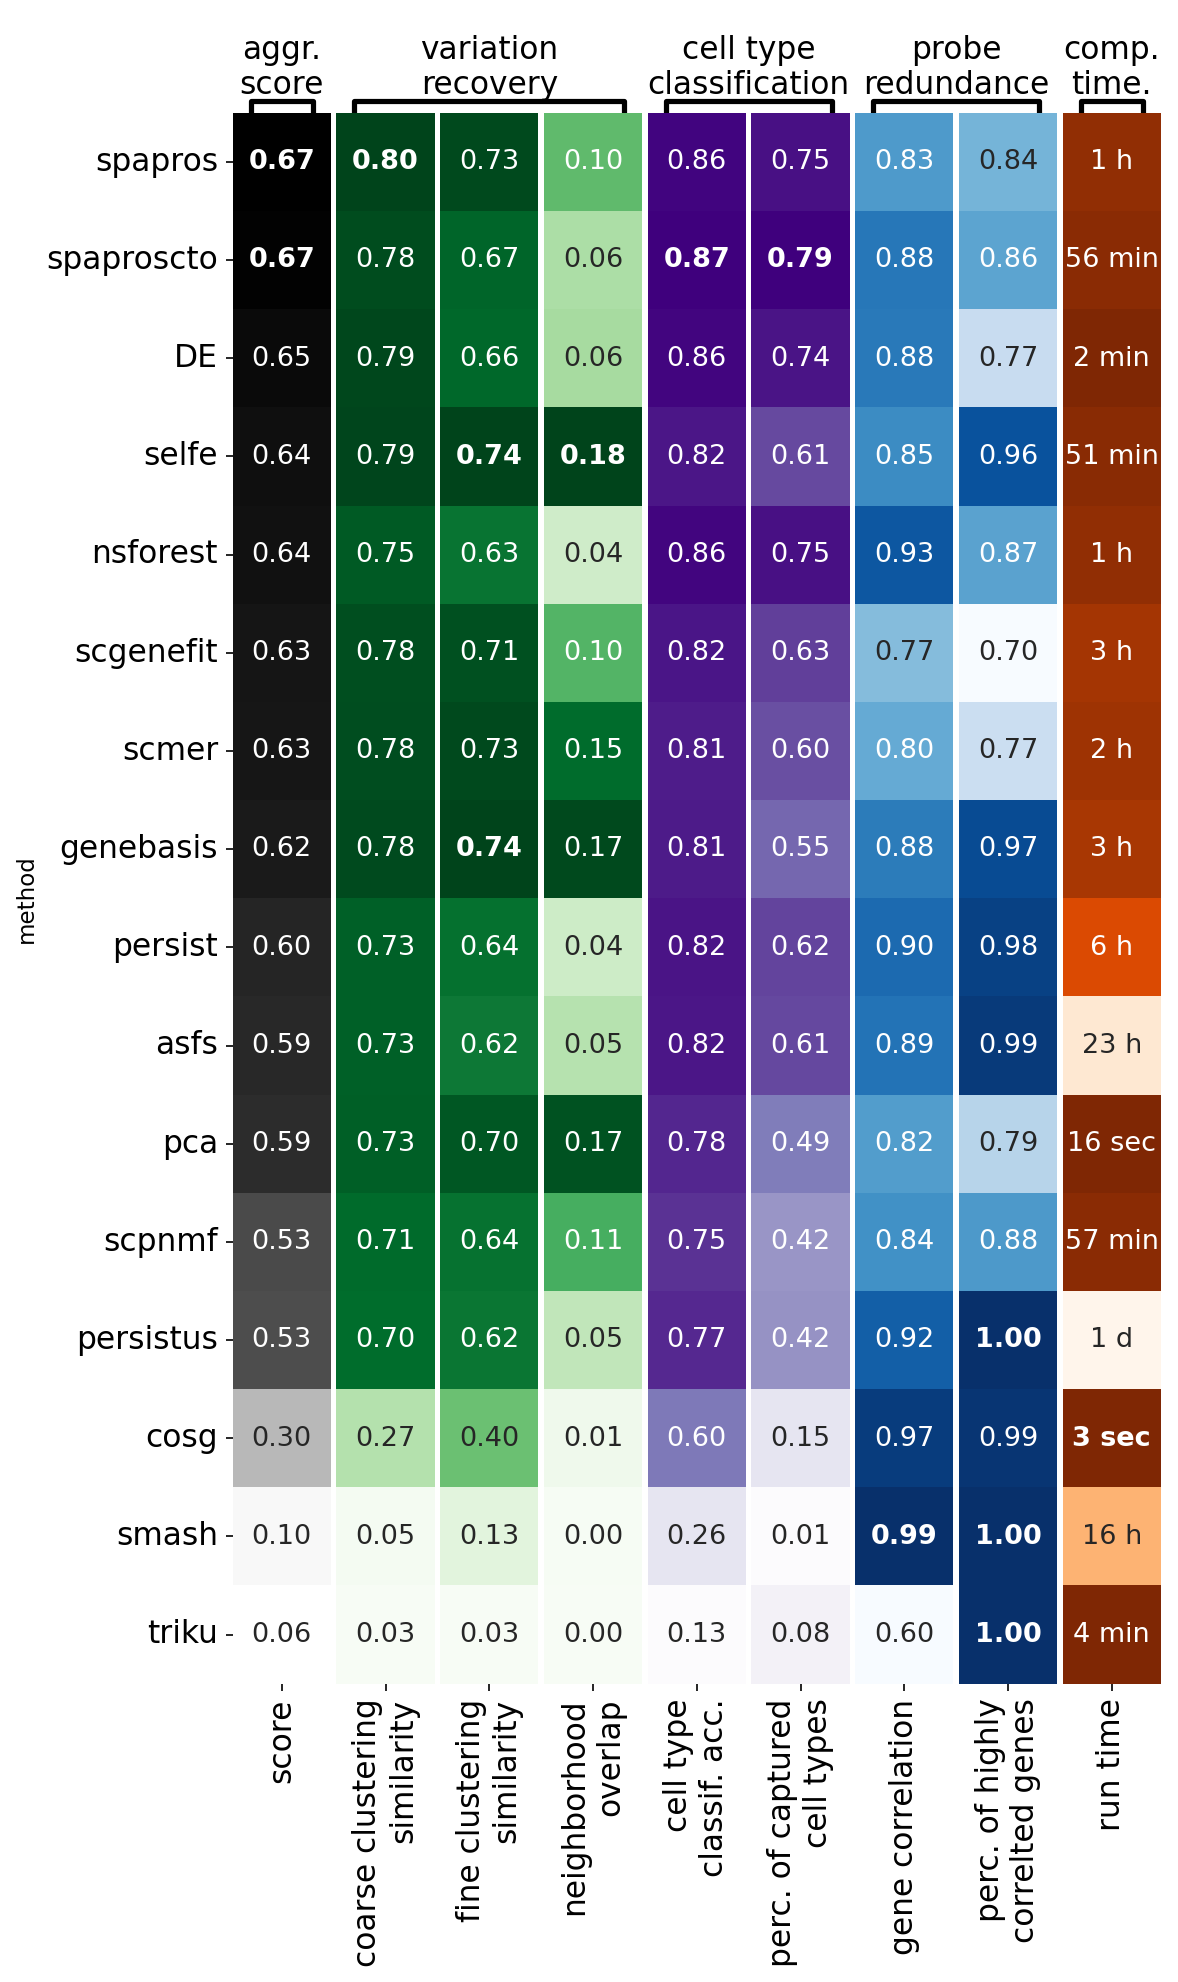

#### Madissoon2019_w_cts n=150 ####


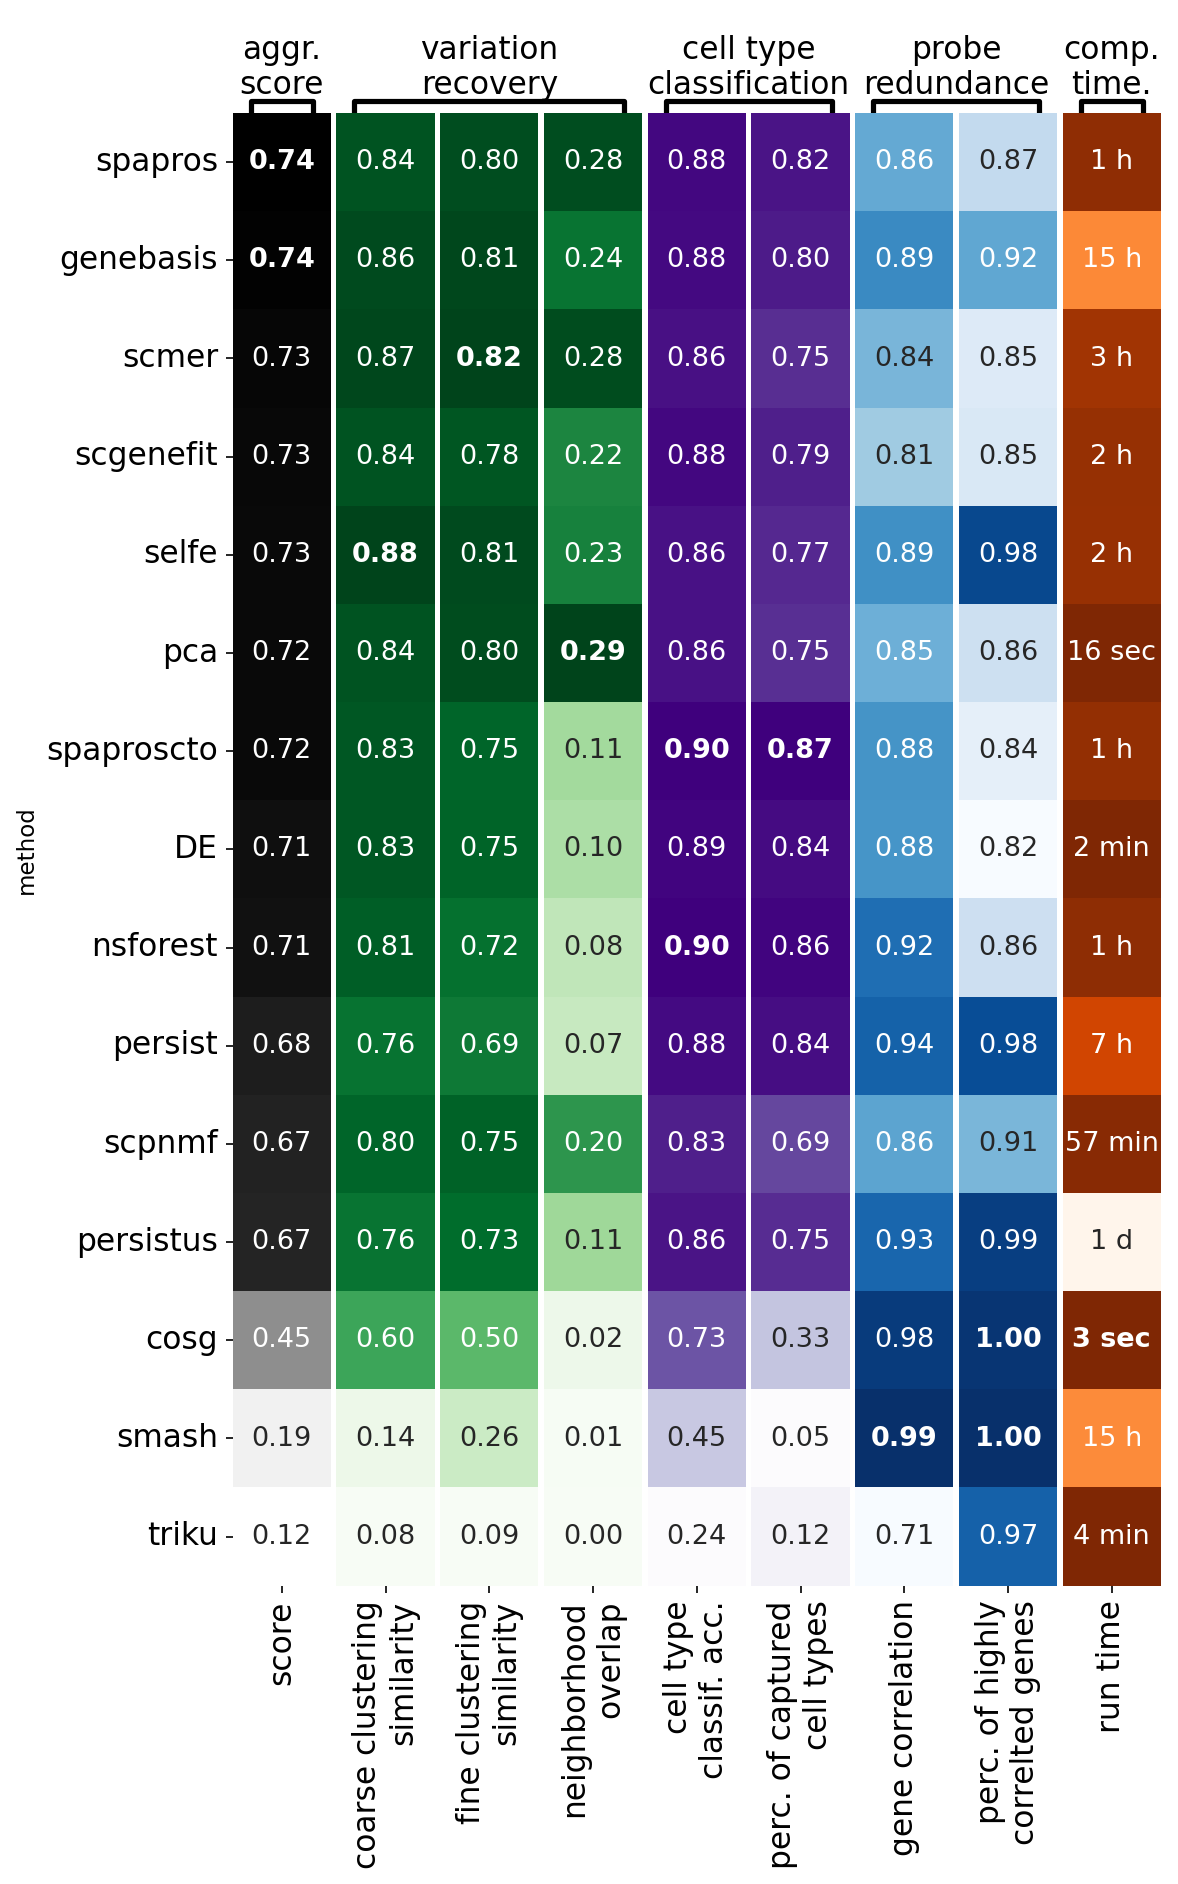

#### Litvinukova2020_w_cts n=50 ####


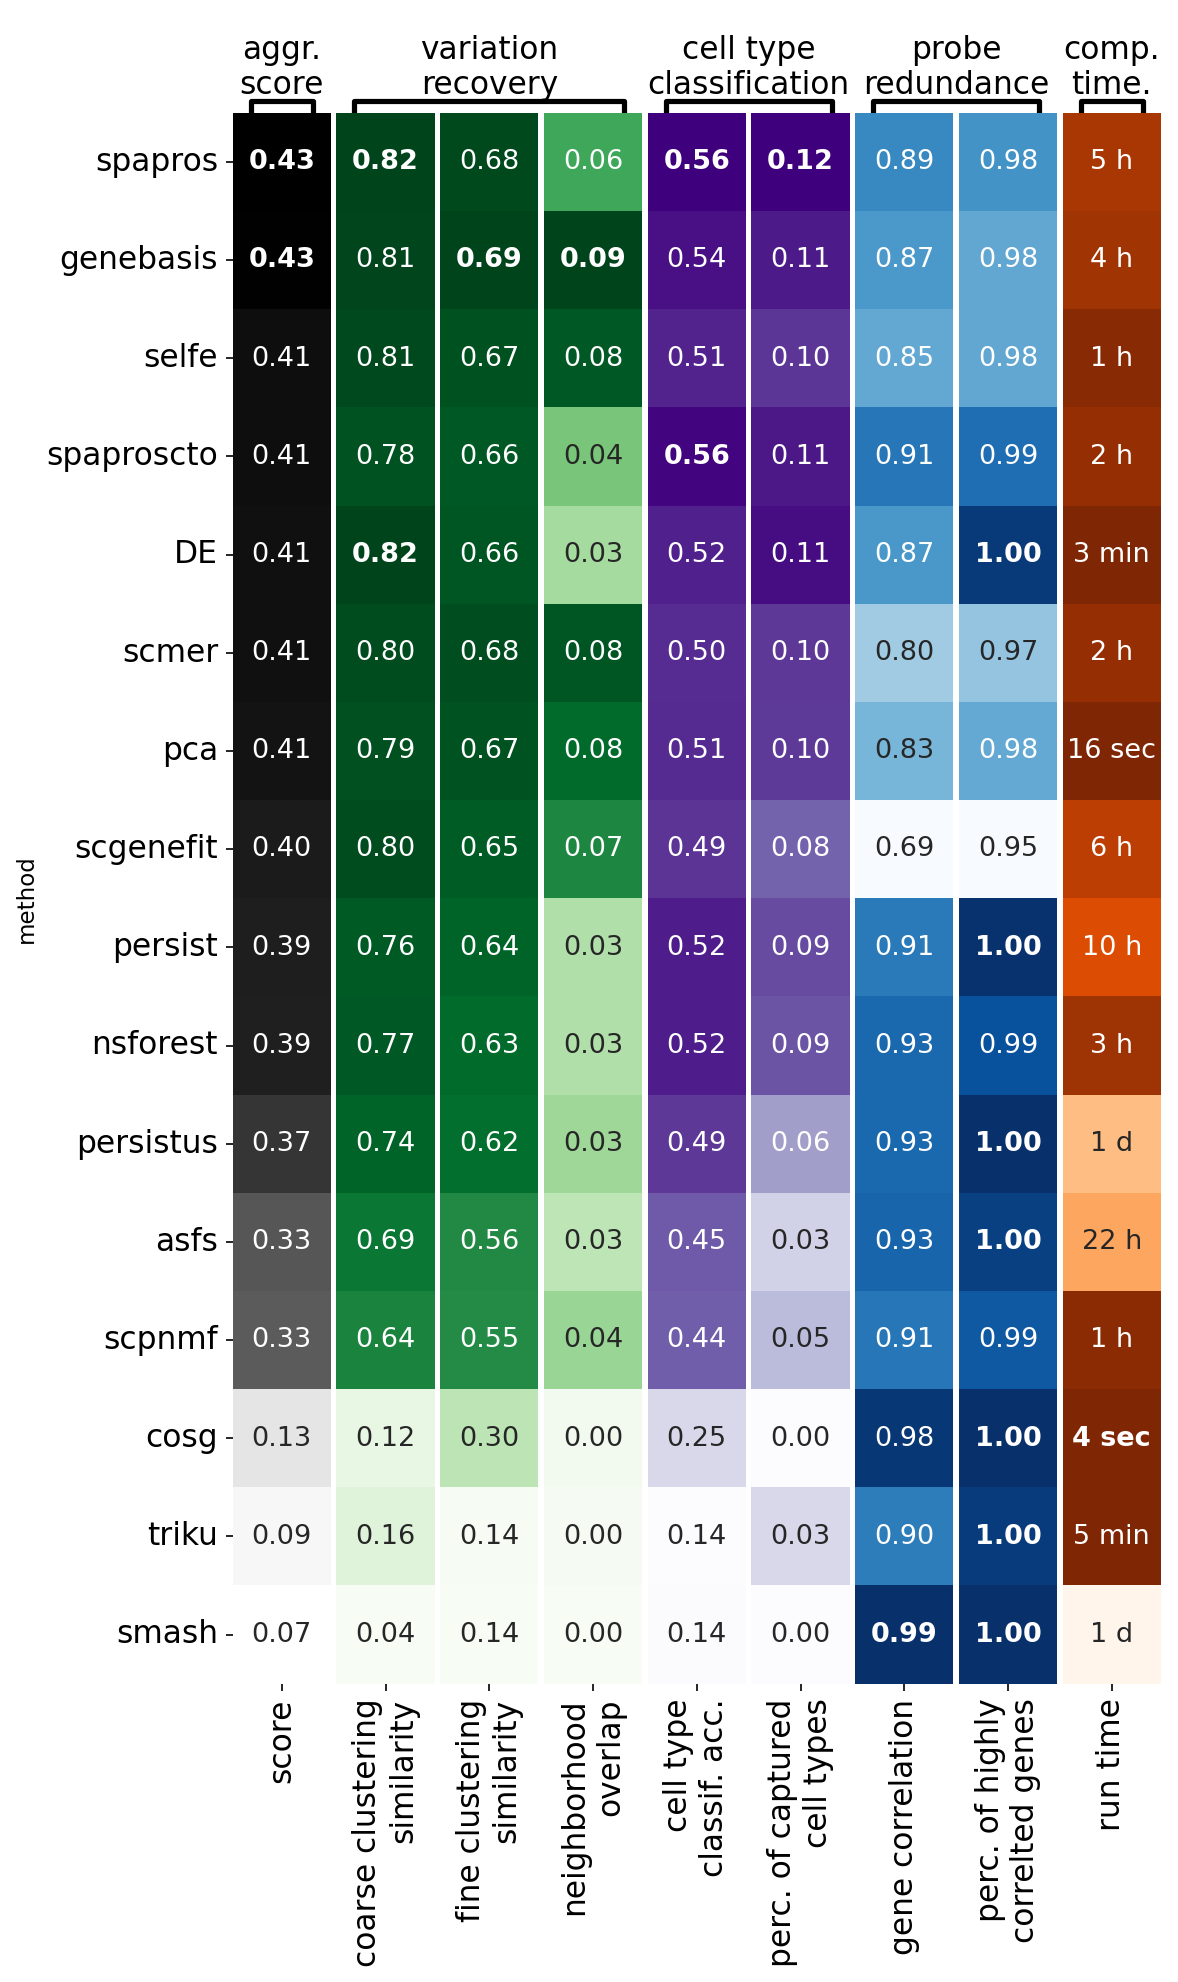

#### Litvinukova2020_w_cts n=150 ####


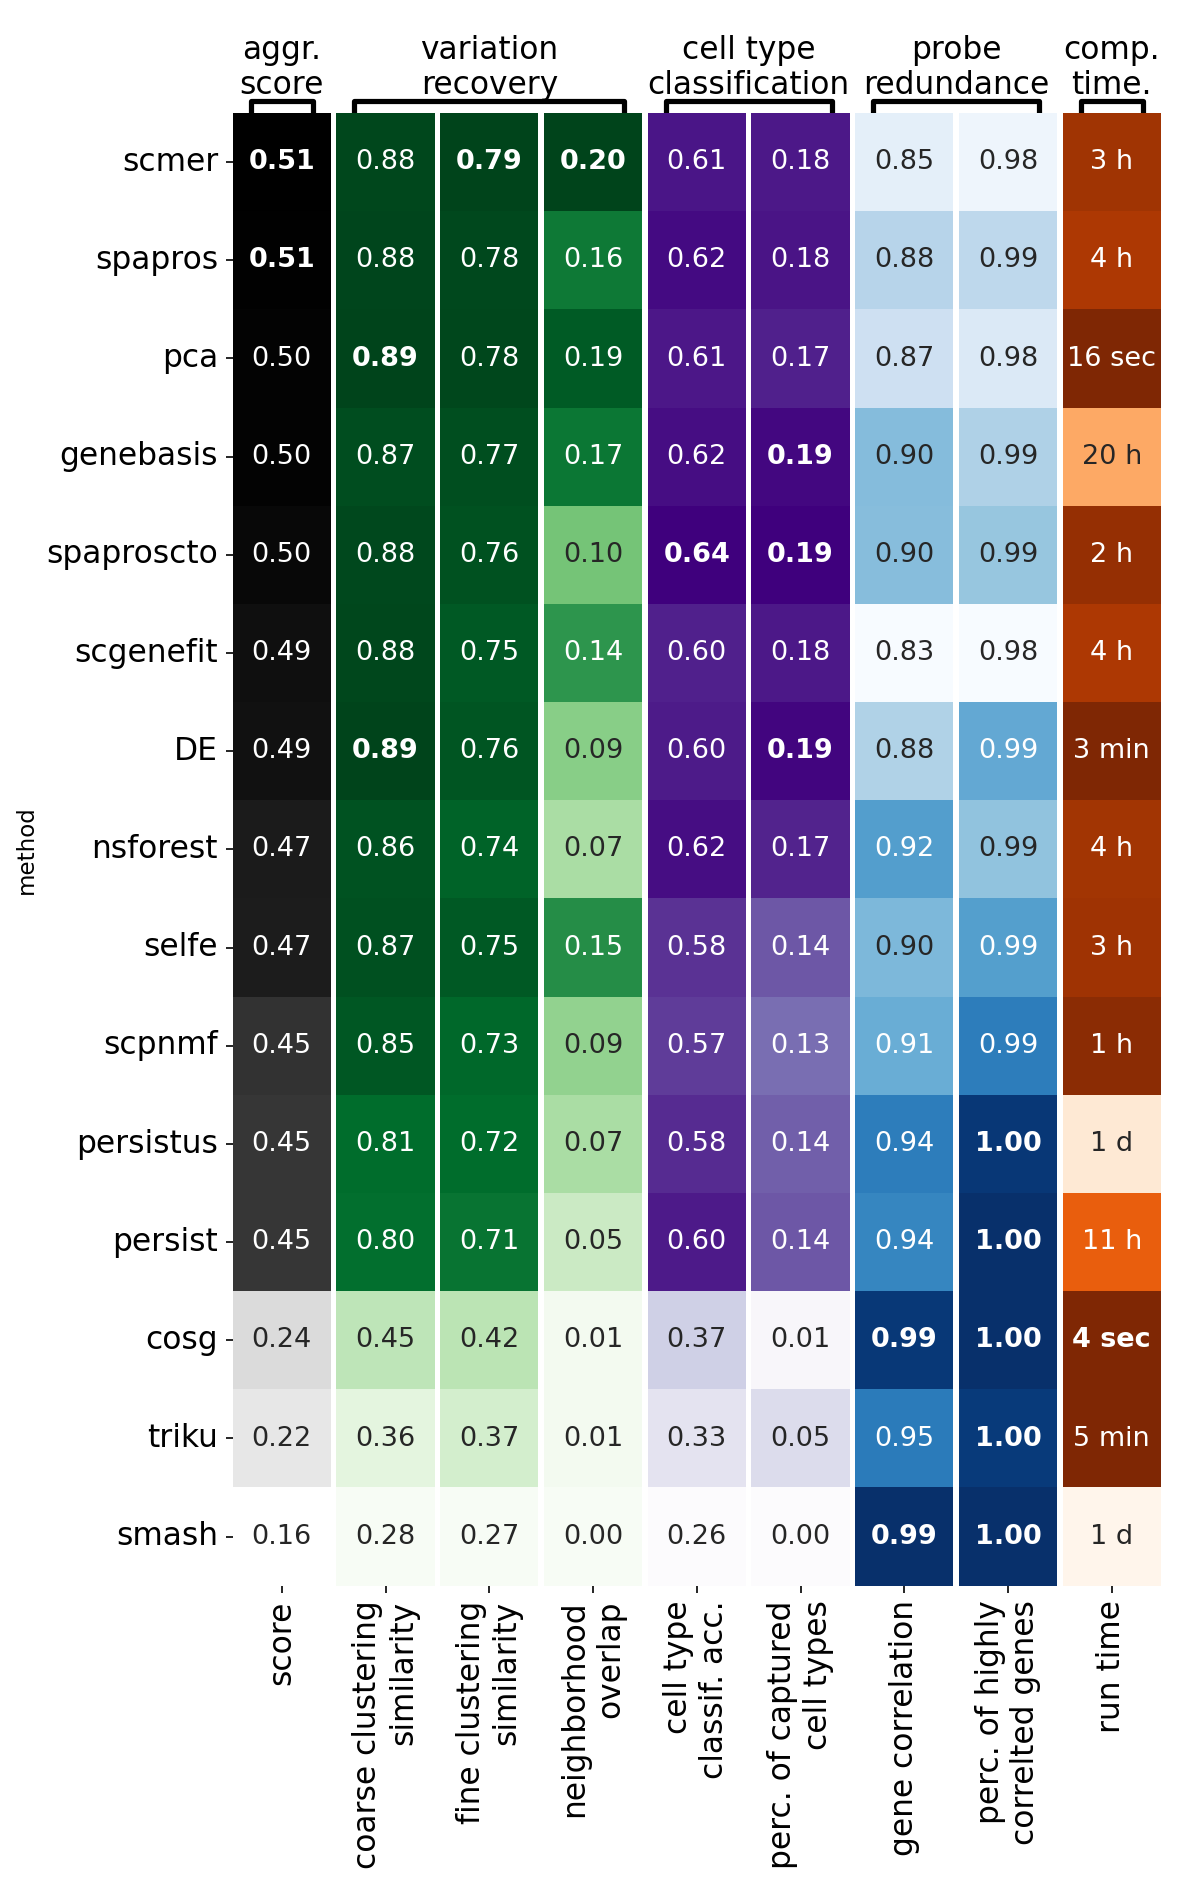

In [24]:
rename_cols = {
    'score'                               : "score",
    #'cluster_similarity nmi_7_23'         : "csc",#"cluster sim. (coarse)",
    #'cluster_similarity nmi_24_60'        : "csf",#"cluster sim. (fine)",
    'cluster_similarity nmi_5_20'         : "csc",#"cluster sim. (coarse)",
    'cluster_similarity nmi_21_60'        : "csf",#"cluster sim. (fine)",
    'knn_overlap mean_overlap_AUC'        : "knn",#"knn overlap",
    'forest_clfs accuracy'                : "cl\nacc",#"classif. accuracy",
    'forest_clfs perct acc > 0.8'         : "ct\ncap",#"cell types captured",
    'gene_corr 1 - mean'                  : "pr",#"probe redundance",#"1 - mean corr",
    'gene_corr perct max < 0.8'           : "pr\nprop",#"proportion red. probes",
    #'marker_corr per celltype'            : "mcorr\nct",#"cell type marker corr.",
    #'marker_corr per marker mean > 0.025' : "mcorr",#"marker corr.",
    #"penalty low_expression"              : "lexpr",#"low expression",    
    #"penalty high_expression"             : "hexpr",#"high expression",
    'time'                        : "rt",#"run time",
}
rename_cols = {
    'score'                               : "score",
    #'cluster_similarity nmi_7_23'         : "csc",#"cluster sim. (coarse)",
    #'cluster_similarity nmi_24_60'        : "csf",#"cluster sim. (fine)",
    'cluster_similarity nmi_5_20'         : "coarse clustering\nsimilarity",#"cluster sim. (coarse)",
    'cluster_similarity nmi_21_60'        : "fine clustering\nsimilarity",#"cluster sim. (fine)",
    'knn_overlap mean_overlap_AUC'        : "neighborhood\noverlap",#"knn overlap",
    'forest_clfs accuracy'                : "cell type\nclassif. acc.",#"classif. accuracy",
    'forest_clfs perct acc > 0.8'         : "perc. of captured\ncell types",#"cell types captured",
    'gene_corr 1 - mean'                  : "gene correlation",#"probe redundance",#"1 - mean corr",
    'gene_corr perct max < 0.8'           : "perc. of highly\ncorrelted genes",#"proportion red. probes",
    #'marker_corr per celltype'            : "mcorr\nct",#"cell type marker corr.",
    #'marker_corr per marker mean > 0.025' : "mcorr",#"marker corr.",
    #"penalty low_expression"              : "lexpr",#"low expression",    
    #"penalty high_expression"             : "hexpr",#"high expression",
    'time'                        : "run time",#"run time",
}


for dataset in ["Madissoon2019_w_cts", "Litvinukova2020_w_cts"]:
    for n in [50, 150]:
        plot_df = df.loc[(df["dataset"] == dataset) & (df["n"] == n)].sort_values("score", ascending=False).copy()
        plot_df = plot_df.set_index("method")
        del plot_df["dataset"]
        del plot_df["n"]

        print("#### " + dataset + " n=" + str(n) + " ####")

        summary_table(plot_df[[col for col in rename_cols]], summaries="all", color_maps={"time":'Oranges_r'}, 
              rename_cols=rename_cols, rename_rows={}, time_format=["time"],
              #groups=[["aggr.\nscore",[0,0]],["variation\nrecovery",[1,3]],["cell type\nclassification",[4,5]],
              #         ["comp.\ntime.",[6,6]] #["techn.\nconstr.",[9,10]],
              #       ], xticklabel_multialignment='center', 
              groups=[["aggr.\nscore",[0,0]],["variation\nrecovery",[1,3]],["cell type\nclassification",[4,5]],
                       ["probe\nredundance",[6,7]],["comp.\ntime.",[8,8]] #["techn.\nconstr.",[9,10]],
                     ], xticklabel_rotation=90, #xticklabel_multialignment='center',
              log_scale=["time_seconds"], show=True, save=f"./figures/benchmark_{dataset}_n{n}.pdf")